# Coding Exercises (Part 13)

## Financial Data: Advanced Analysis Techniques

### Exercise 13: Financial Data: Rolling Statistics and Reporting

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

__Import__ the Dow Jones Industrial Average Index (__DJIA__) dataset (__djia.csv__).

__Calculate__, __Visualize__ and __Compare__ the DJIA __SMA50 vs. SMA200__ (based on daily Close Prices). __Select__ the day __May 15, 2017__ and __Verify__, whether a Trader with __SMA Momentum Strategy__ was __invested__ (long) in the DJIA at this day! 

__Calculate__ the DJIA __36 months rolling mean return__ and the __36 months rolling standard deviation__ of returns (based on monthly returns of Close prices). __Visualize__, __Compare__ and __indicate__, whether there is a __positive or negative relation__ between __risk and return__!  

__Import__ the __S&P 500 Total Return Index__ dataset (__SP500_TR.csv__) and __create__ the annual __Return Triangle__. Based on historical data, are there any time periods of __11 Years or longer__ where investors __lost money__?

__Import__ the monthly returns of the __S&P 500__ Price Return Index and the __DJIA__ Price Return Index (__sp500_djia.csv__). 

__Calculate__ and __Visualize__ the 36 months __rolling correlation__ between S&P 500 returns and DJIA returns.

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [1]:
#run the cell!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

116. __Import__ price data for the Dow Jones Industrial Average Index (DJIA) (__djia.csv__), __create__ and __DatetimeIndex__ (column "Date") and __save__ the DataFrame in the variable __djia__. <br> 
__Inspect__! 

In [4]:
djia = pd.read_csv("./djia.csv", parse_dates=["Date"], index_col="Date")

In [5]:
# run the cell!
djia.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-12-29,2736.35,2763.01,2726.96,2753.20,2753.20,14580000
1990-01-02,2748.72,2811.65,2732.51,2810.15,2810.15,20680000
1990-01-03,2814.20,2834.04,2786.26,2809.73,2809.73,23620000
1990-01-04,2804.39,2821.46,2766.42,2796.08,2796.08,24370000
1990-01-05,2786.90,2810.15,2758.11,2773.25,2773.25,20290000


In [6]:
# run the cell!
djia.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-21,22871.74,23254.59,22396.34,22445.37,22445.37,900510000
2018-12-24,22317.28,22339.87,21792.20,21792.20,21792.20,308420000
2018-12-26,21857.73,22878.92,21712.53,22878.45,22878.45,433080000
2018-12-27,22629.06,23138.89,22267.42,23138.82,23138.82,407940000
2018-12-28,23213.61,23381.88,22981.33,23062.40,23062.40,336510000


In [7]:
# run the cell!
djia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7307 entries, 1989-12-29 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7307 non-null   float64
 1   High       7307 non-null   float64
 2   Low        7307 non-null   float64
 3   Close      7307 non-null   float64
 4   Adj Close  7307 non-null   float64
 5   Volume     7307 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 399.6 KB


__What is the DJIA?__ <br>

_"The Dow Jones Industrial Average (DJIA), or simply the Dow (/ˈdaʊ/), is a stock market index that indicates the value of 30 large, publicly owned companies based in the United States, and how they have traded in the stock market during various periods of time. These 30 companies are also included in the S&P 500 Index. The value of the Dow is not a weighted arithmetic mean and does not represent its component companies' market capitalization, but rather the sum of the price of one share of stock for each component company"_ (Wikipedia)

In [8]:
# run the cell (we will only work with the Close column)
djia = djia.Close.to_frame()

117. __Create__ the __SMA50__ (Simple Moving Average with Window of 50) and __add "SMA50"__ as __additional column__ to the djia DataFrame! Do __not drop__ NaNs! <br>
__Fill in the gaps!__

In [11]:
djia["SMA50"] = djia.Close.rolling(window = 50).mean()

In [12]:
# run the cell!
djia.tail()

,Close,SMA50
Date,,
2018-12-21,22445.37,24914.1782
2018-12-24,21792.20,24848.9656
2018-12-26,22878.45,24799.7348
2018-12-27,23138.82,24757.5002
2018-12-28,23062.40,24702.7798


118. __Add__ also the __SMA200__ to the DataFrame djia!

In [13]:
djia["SMA200"] = djia.Close.rolling(window=200).mean()

In [14]:
# run the cell!
djia.tail()

,Close,SMA50,SMA200
Date,,,
2018-12-21,22445.37,24914.1782,25046.02945
2018-12-24,21792.20,24848.9656,25028.31175
2018-12-26,22878.45,24799.7348,25016.81095
2018-12-27,23138.82,24757.5002,25007.46990
2018-12-28,23062.40,24702.7798,24998.99130


119. __Visualize djia__ (all three columns)! __Fill in the gaps__!

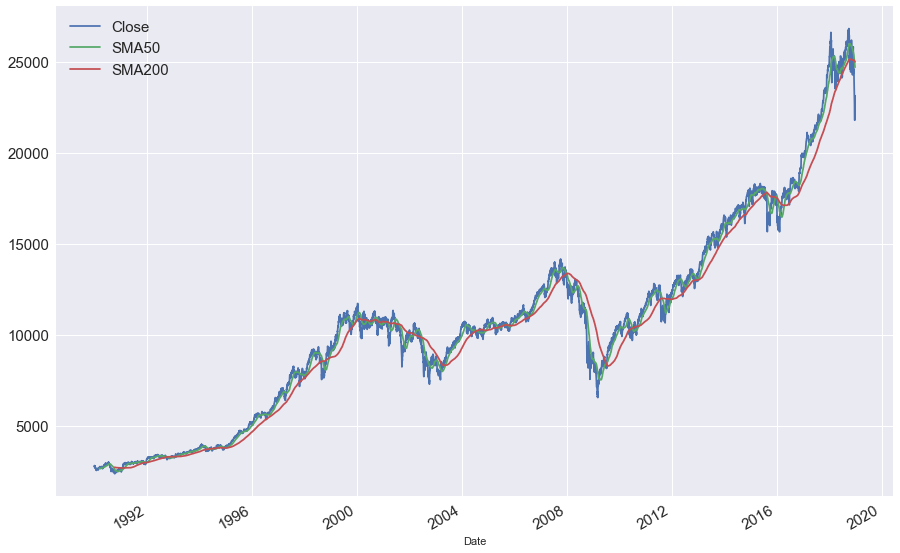

In [15]:
djia.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

120. __Select__ the day __May 15, 2017__. __Verify__, whether a Trader with __SMA Momentum Strategy__ was __invested__ (long) in the DJIA at this day!  

In [18]:
djia.loc["May 15, 2017"]

Close     20981.94000
SMA50     20786.48160
SMA200    19522.93675
Name: 2017-05-15 00:00:00, dtype: float64

As the SMA50 is above the SMA200, he was invested in the DJIA!

121. __Convert__ djia Closing Prices to __monthly__ frequency (last trading price of each month) and __convert__ to DataFrame!<br>
__Save__ the new DataFrame in the variable __djia_m__! __Fill in the gaps__!

In [73]:
djia_m = djia.Close.resample("M", kind = "period").last().to_frame()

In [74]:
# run the cell!
djia_m.head()

,Close
Date,
1989-12,2753.20
1990-01,2590.54
1990-02,2627.25
1990-03,2707.21
1990-04,2656.76


122. Calculate __monthly (simple) returns__ (add new column __"Return"__)! 

In [32]:
djia_m["Return"] = djia_m.Close.pct_change().dropna()

In [33]:
# run the cell!
djia_m.head(30)

,Close,Return
Date,,
1989-12,2753.200000,NaN
1990-01,2679.236364,-0.026865
1990-02,2614.177368,-0.024283
1990-03,2700.133182,0.032881
1990-04,2708.255000,0.003008
1990-05,2793.812273,0.031591
1990-06,2894.830000,0.036158
1990-07,2934.228095,0.013610
1990-08,2681.887826,-0.085999


123. __Calculate__ the __36 months rolling mean Return__ and add new column (__"Roll_Return"__). __Fill in the gaps!__

In [45]:
djia_m["Roll_Return"] = djia_m.Return.rolling(36).mean()

In [46]:
# run the cell!
djia_m.tail()

,Close,Return,Roll_Return,Roll_Risk
Date,,,,
2018-08,25629.988261,0.026093,0.011736,0.095225
2018-09,26232.667895,0.023515,0.013564,0.089851
2018-10,25609.341739,-0.023761,0.011472,0.089455
2018-11,25258.675238,-0.013693,0.010215,0.089786
2018-12,23832.105556,-0.056478,0.008931,0.097070


124. __Calculate__ the __36 months rolling Standard Deviation of Returns__ and add new column (__"Roll_Risk"__)

In [47]:
djia_m["Roll_Risk"] = djia_m.Return.rolling(36).std()

In [48]:
# run the cell!
djia_m.tail()

,Close,Return,Roll_Return,Roll_Risk
Date,,,,
2018-08,25629.988261,0.026093,0.011736,0.027489
2018-09,26232.667895,0.023515,0.013564,0.025938
2018-10,25609.341739,-0.023761,0.011472,0.025823
2018-11,25258.675238,-0.013693,0.010215,0.025919
2018-12,23832.105556,-0.056478,0.008931,0.028022


125. __Annualize__ rolling return and rolling risk! __Fill in the gaps!__

In [49]:
djia_m["Roll_Return"] = djia_m["Roll_Return"]*12
djia_m["Roll_Risk"] = djia_m["Roll_Risk"]*np.sqrt(12)

In [50]:
# run the cell!
djia_m.tail()

,Close,Return,Roll_Return,Roll_Risk
Date,,,,
2018-08,25629.988261,0.026093,0.140827,0.095225
2018-09,26232.667895,0.023515,0.162764,0.089851
2018-10,25609.341739,-0.023761,0.137660,0.089455
2018-11,25258.675238,-0.013693,0.122577,0.089786
2018-12,23832.105556,-0.056478,0.107167,0.097070


126. __Plot__ rolling risk and rolling return (lineplot)! __Fill in the gaps__! Do you think that __risk and return__ are __negatively correlated__?

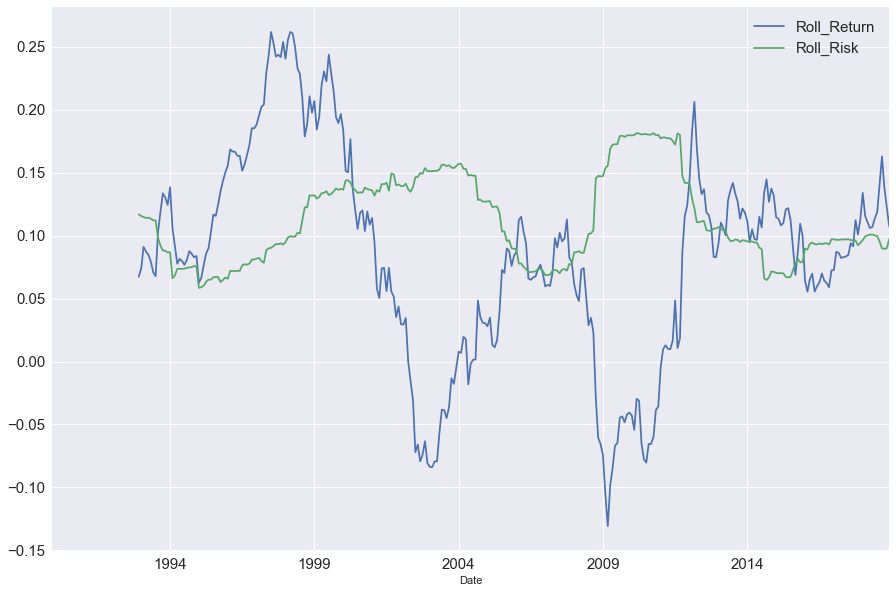

In [51]:
djia_m.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

Yes, it seems like periods with high risk have low/negative returns and vice versa.

127. __Import__ the columns __"Date"__ and __"Close"__ of the S&P 500 Total Return Index dataset (__SP500_TR.csv__) and __save__ the DataFrame in the variable __SP500_TR__! <br>
__Fill in the gaps__! <br>
(Remember: In the class, we worked with the S&P 500 Price Return Index that does not include dividends. The underlying assumption for the Total Return Index is: all dividend payouts are reinvested into the index, no taxation, transaction costs, etc.)

In [54]:
SP500_TR = pd.read_csv("SP500_TR.csv", parse_dates = ["Date"], index_col = "Date", usecols = ["Date", "Close"] )

In [55]:
# run the cell and inspect!
SP500_TR.head()

,Close
Date,
1988-12-30,288.12
1989-01-03,285.65
1989-01-04,289.99
1989-01-05,290.61
1989-01-06,291.29


In [56]:
# run the cell and inspect!
SP500_TR.tail()

,Close
Date,
2018-12-21,4802.51
2018-12-24,4672.66
2018-12-26,4904.49
2018-12-27,4946.94
2018-12-28,4941.61


In [57]:
# convert to annual frequency! run the cell!
SP500_TR = SP500_TR.resample("A", kind = "period").last()

In [58]:
# run the cell and inspect!
SP500_TR.head()

,Close
Date,
1988,288.12
1989,379.41
1990,367.63
1991,479.63
1992,516.18


### Create the S&P500_TR Return Triangle and follow the next steps:

128. __Calculate__ annual __log returns__ and save the new DataFrame in the variable __annual_ret__! __Fill in the gaps!__

In [60]:
annual_ret = np.log(SP500_TR / SP500_TR.shift()).dropna()

In [61]:
# run the cell
annual_ret.columns = ["Return"]
annual_ret.head()

,Return
Date,
1989,0.275240
1990,-0.031540
1991,0.265938
1992,0.073441
1993,0.096018


In [62]:
# run the cell! -> List comprehension with investment periods from 30 to 1
windows = [year for year in range(annual_ret.index.size, 0, -1)]
windows

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

129. __Create 30 new columns__ (one column for each rolling return from rolling window = 30 to rolling window = 1)! __Fill in the gaps!__

In [63]:
for year in windows:
    annual_ret["{}Y".format(year)] = annual_ret.Return.rolling(year).mean()

In [64]:
# run the cell and inspect!
annual_ret

,Return,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1989,0.275240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275240
1990,-0.031540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121850,-0.031540
1991,0.265938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169879,0.117199,0.265938
1992,0.073441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.145770,0.102613,0.169689,0.073441
1993,0.096018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.135819,0.100964,0.145132,0.084729,0.096018
1994,0.013131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.115371,0.083397,0.112132,0.060863,0.054574,0.013131
1995,0.319008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.144462,0.122666,0.153507,0.125399,0.142719,0.166069,0.319008
1996,0.206697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.152241,0.134670,0.162372,0.141659,0.158713,0.179612,0.262852,0.206697
1997,0.287903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.167315,0.153824,0.180305,0.166033,0.184551,0.206684,0.271202,0.247300,0.287903


130. __Create__ the new DataFrame __triangle__ by __dropping__ the __Return__ column from annual_ret! __Fill in the gaps__!

In [65]:
triangle = annual_ret.drop(columns = ["Return"])

In [66]:
# run the cell and inspect!
triangle

,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,21Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275240
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121850,-0.031540
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169879,0.117199,0.265938
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.145770,0.102613,0.169689,0.073441
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.135819,0.100964,0.145132,0.084729,0.096018
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.115371,0.083397,0.112132,0.060863,0.054574,0.013131
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.144462,0.122666,0.153507,0.125399,0.142719,0.166069,0.319008
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.152241,0.134670,0.162372,0.141659,0.158713,0.179612,0.262852,0.206697
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.167315,0.153824,0.180305,0.166033,0.184551,0.206684,0.271202,0.247300,0.287903


131. __Create__ the Return Triangle __Matrixplot__! __Fill in the gaps__! <br>
Based on historical data, are there any time periods of __11 Years or longer__ where investors __lost money__?

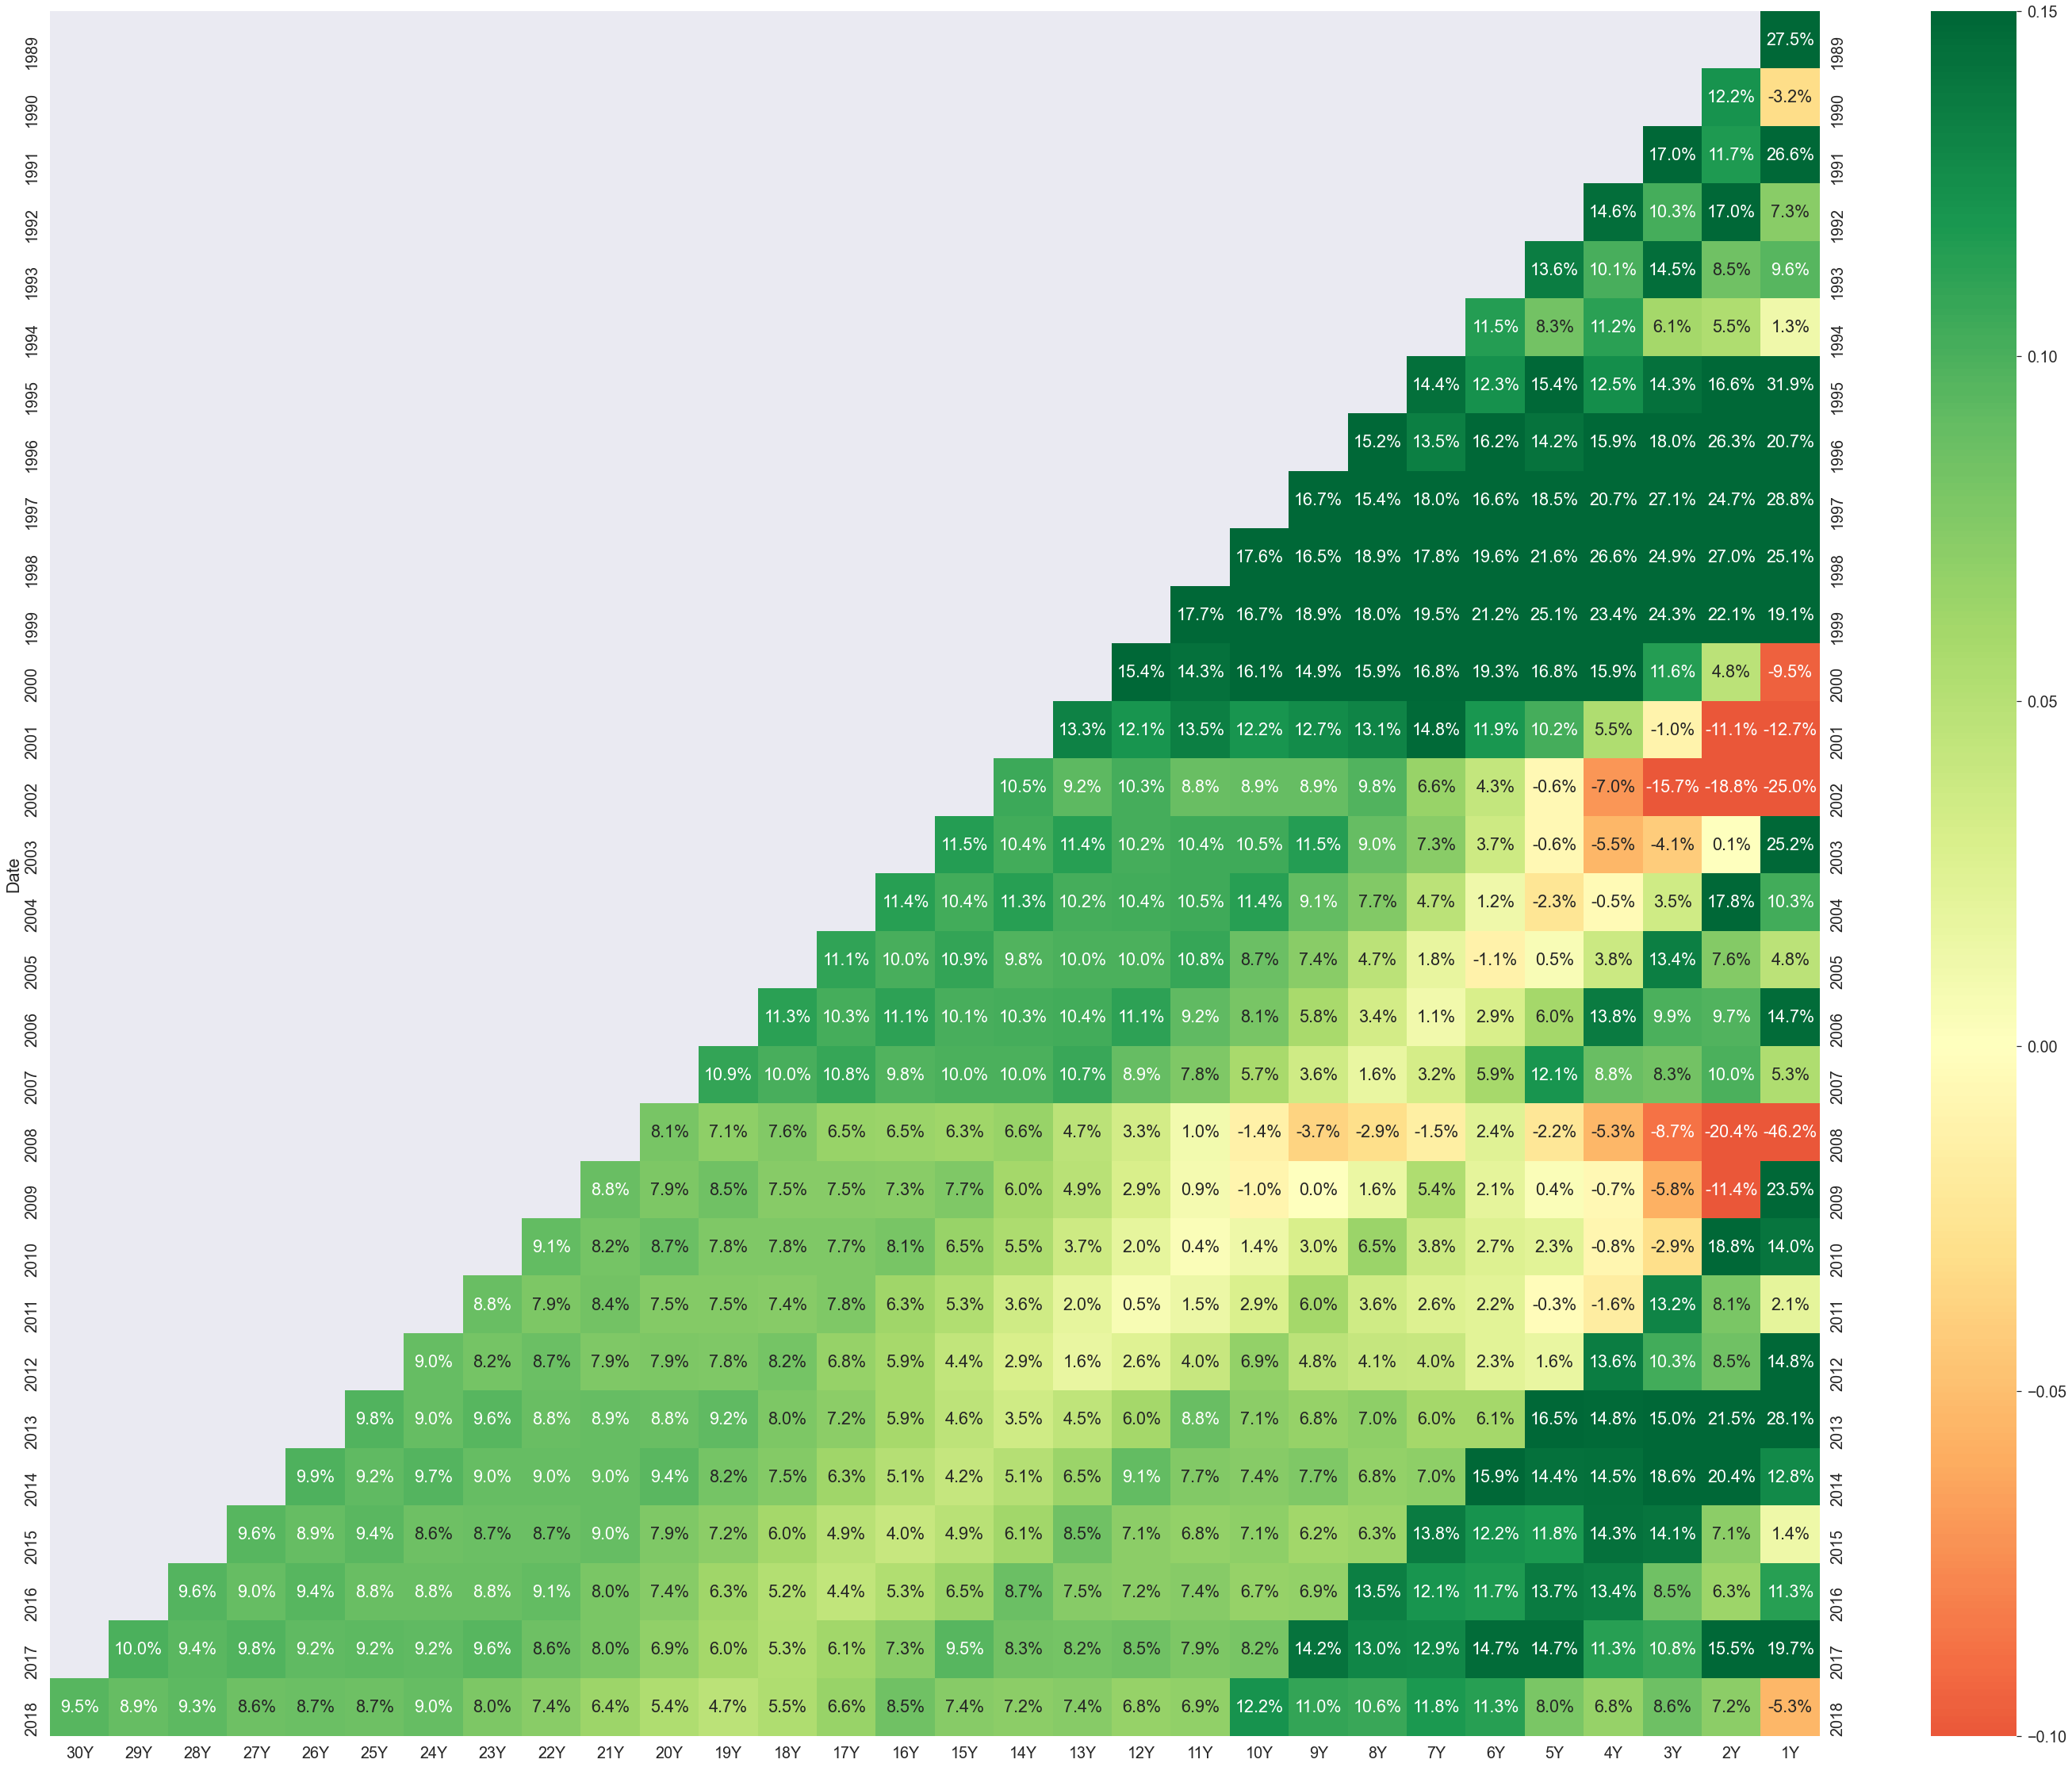

In [75]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

No! Investors lost money during the 10-Year Investment Periods from 1999 till 2008 and from 2000 till 2009. That are the historical worst cases.

132. __Import__ the monthly returns of the __S&P 500__ Price Return Index and the __DJIA__ Price Return Index and __save__ the DataFrame in the variable __SP500_DJIA__! __Fill in the gaps__! 

In [76]:
SP500_DJIA = pd.read_csv("sp500_djia.csv", parse_dates = ["Date"], index_col = "Date")

In [77]:
SP500_DJIA.head()

,SP500,DJIA
Date,,
1990-01-01,-0.068817,-0.059080
1990-02-01,0.008539,0.014171
1990-03-01,0.024255,0.030435
1990-04-01,-0.026887,-0.018635
1990-05-01,0.091989,0.082770


133. __Calculate__ the 36 months __rolling correlation__ between S&P 500 returns and DJIA returns and __save__ the new Series in the variable __roll_corr__! <br> 
__Fill in the gaps__!

In [78]:
roll_corr = SP500_DJIA.SP500.rolling(36).corr(SP500_DJIA.DJIA)

In [79]:
#run the cell!
roll_corr.tail(15)

Date
2017-10-01    0.961900
2017-11-01    0.961733
2017-12-01    0.961167
2018-01-01    0.961583
2018-02-01    0.962321
2018-03-01    0.962304
2018-04-01    0.962922
2018-05-01    0.960418
2018-06-01    0.957506
2018-07-01    0.962740
2018-08-01    0.953301
2018-09-01    0.951599
2018-10-01    0.942731
2018-11-01    0.942479
2018-12-01    0.958082
dtype: float64

134. __Plot roll_corr__! (figsize = (15, 8))

<AxesSubplot:xlabel='Date'>

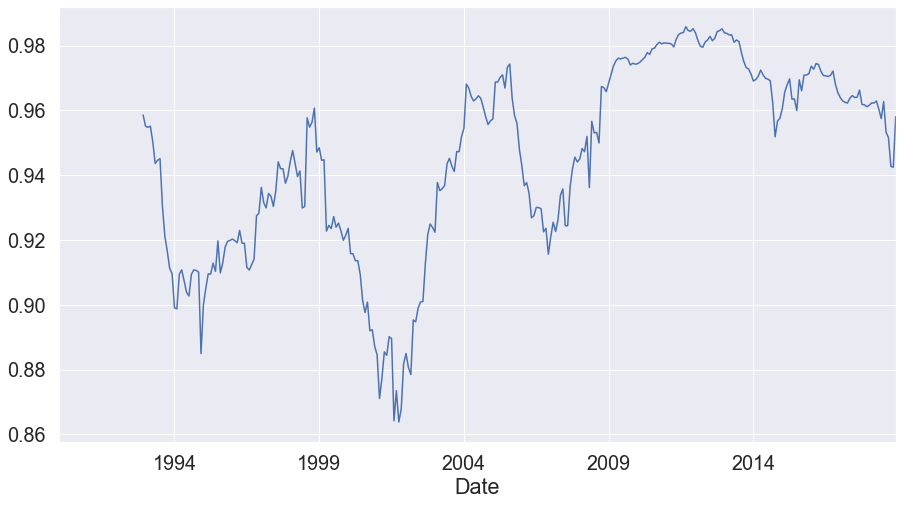

In [80]:
roll_corr.plot(figsize=(15,8))

# Well Done!

-------------------

# Hints (Spoiler!)

116. pd.read_csv(---, index_col= ---, parse_dates = ---)

117. rolling() method, a rolling window of 50, mean()

118. rolling window of 200


119. plot() method

120. djia.loc[---]

121. resample() and last() method

122. pct_change() method

123. rolling() and mean() method

124. rolling() method with window of 36 months, std() method

125. 12 months, for the risk: square root of 12

126. plot() method

127. "SP500_TR.csv", the columns "Date" and "Close"

128. np.log(), shift()

129. the rolling __mean__ __Return__

130. drop() method, columns parameter

131. pass triangle DataFrame to seaborn heatmap

132. pd.read_csv() method

133. rolling() and corr() method

134. plot() method